In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

In [3]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train = pd.read_csv('train_150k.txt', delimiter='\t',names=['Feeling','Text'])


In [11]:
test=pd.read_csv('test_62k.txt',delimiter='\t',names=['Feeling','Text'])

In [13]:
#Removing twitter handles
combine=train.append(test,ignore_index=True)
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
   
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['Text'],"@[\w]*") 
combine.head()

,Feeling,Text,tidy_tweet
0,0,Starting back at work today Looks like it'l...,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!,yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las...","aww, have fun! I just had my 3D last week!"


In [14]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,Feeling,Text,tidy_tweet
0,0,Starting back at work today Looks like it'l...,Starting back work today Looks like it'll rain...
1,1,Sugar levels dropping... munchies setting in. ...,Sugar levels dropping... munchies setting Luck...
2,1,@karineb22 yeah!!! have a great summer break!,yeah!!! have great summer break!
3,1,hannah montana was very good. now going to re...,hannah montana very good. going read twilight.
4,1,"@Mayra326 aww, have fun! I just had my 3D las...","aww, have fun! just last week!"


In [15]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0    [Starting, back, work, today, Looks, like, it'...
1    [Sugar, levels, dropping..., munchies, setting...
2               [yeah!!!, have, great, summer, break!]
3    [hannah, montana, very, good., going, read, tw...
4                [aww,, have, fun!, just, last, week!]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

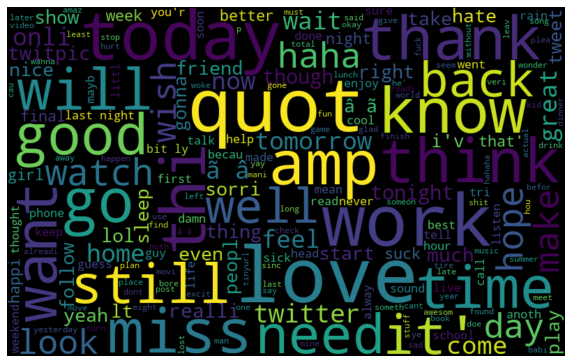

In [18]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [21]:
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(211983, 1000)

In [22]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['Feeling'],
                                                    test_size=0.2, random_state=69)

In [23]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (169586, 1000)
X_test_shape :  (42397, 1000)
y_train_shape :  (169586,)
y_test_shape :  (42397,)


In [24]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

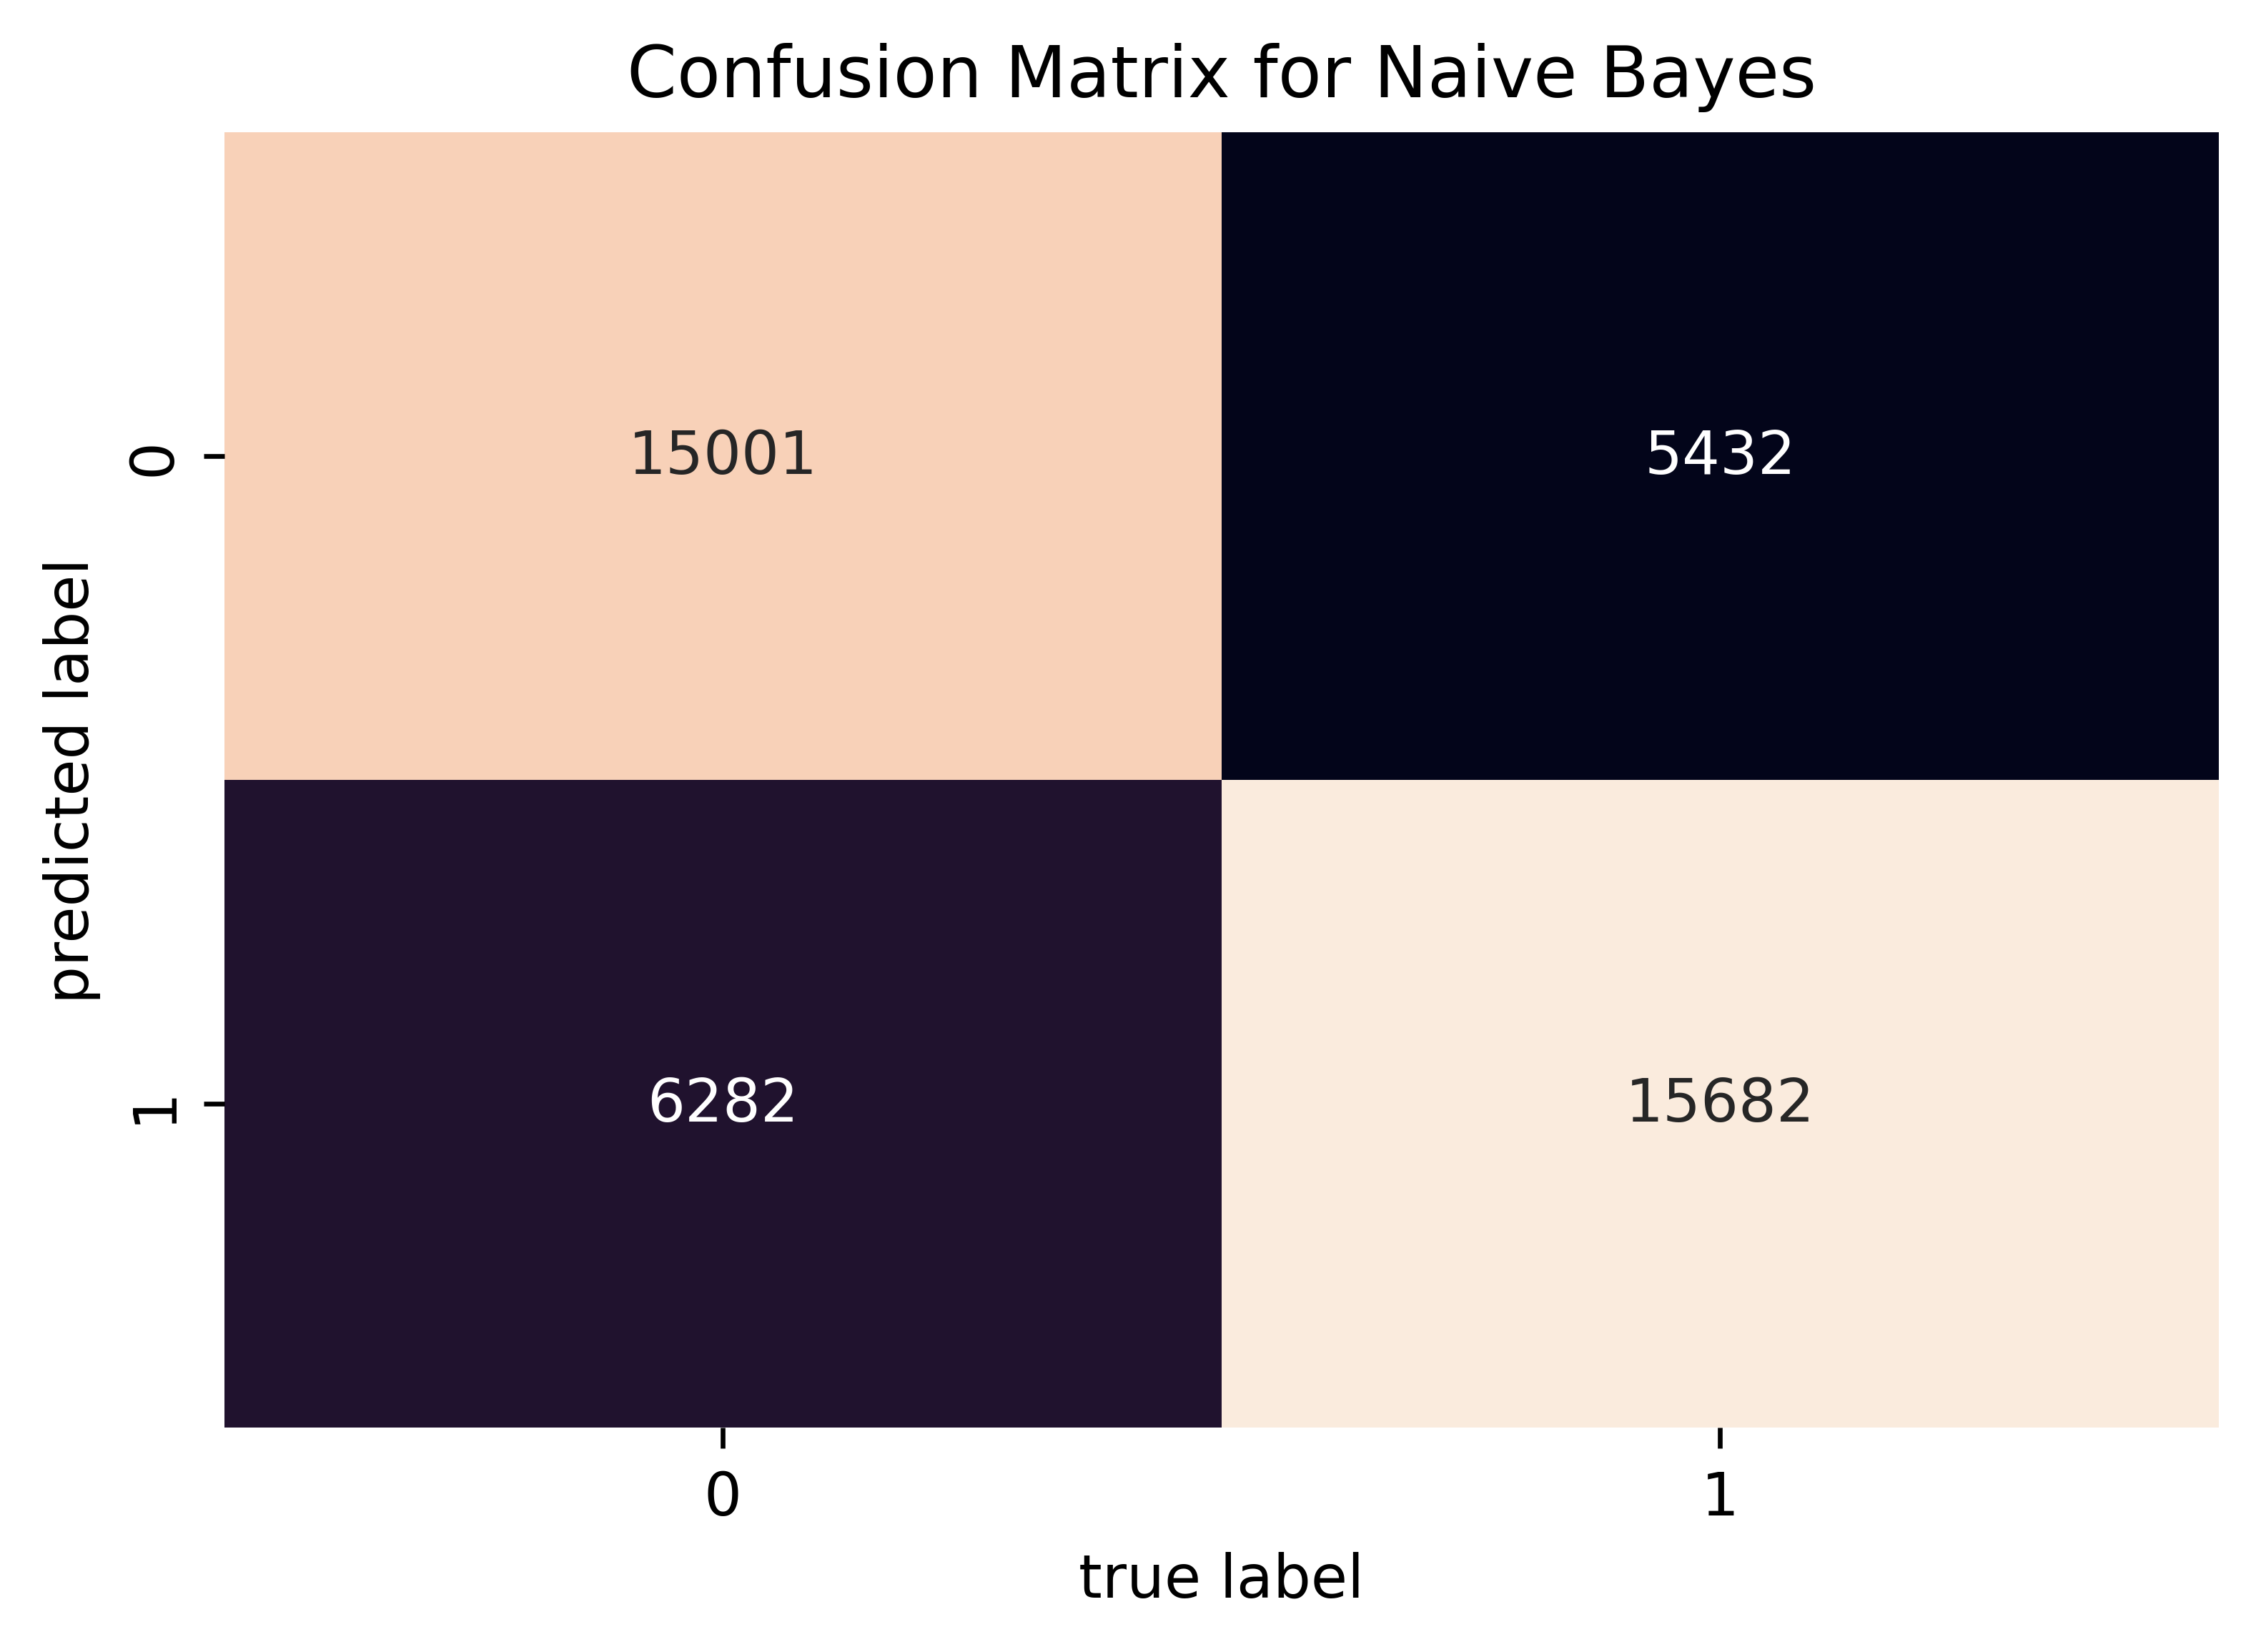

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7237068660518433
